In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_categorize

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()
df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

Categorizing bmi feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1441
           1       0.82      0.76      0.79      1413

    accuracy                           0.80      2854
   macro avg       0.80      0.80      0.80      2854
weighted avg       0.80      0.80      0.80      2854

Node Labels:
 Annotation(0.641348, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


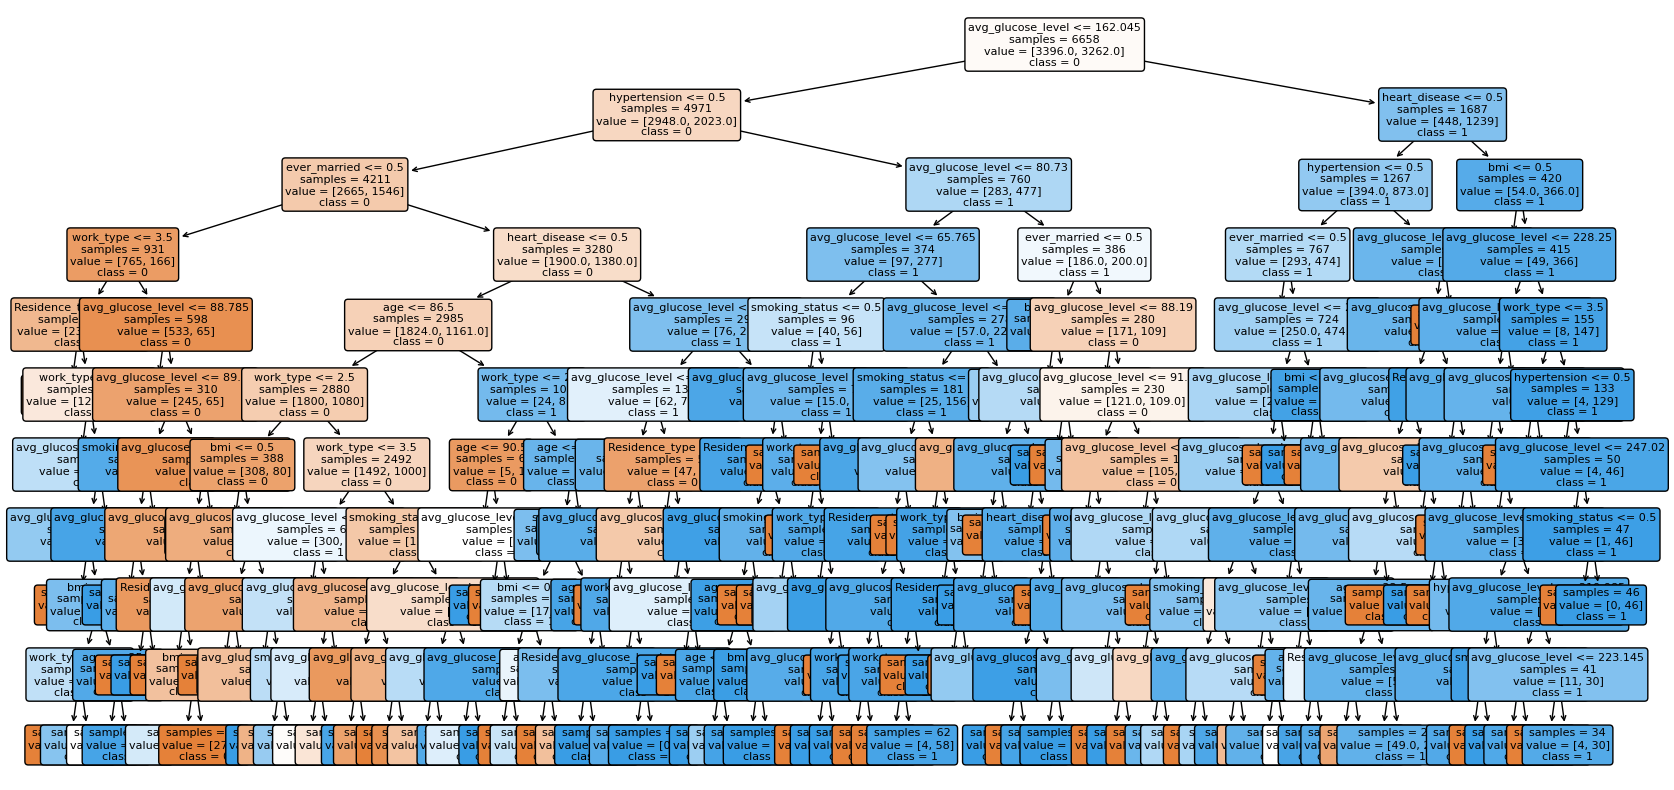

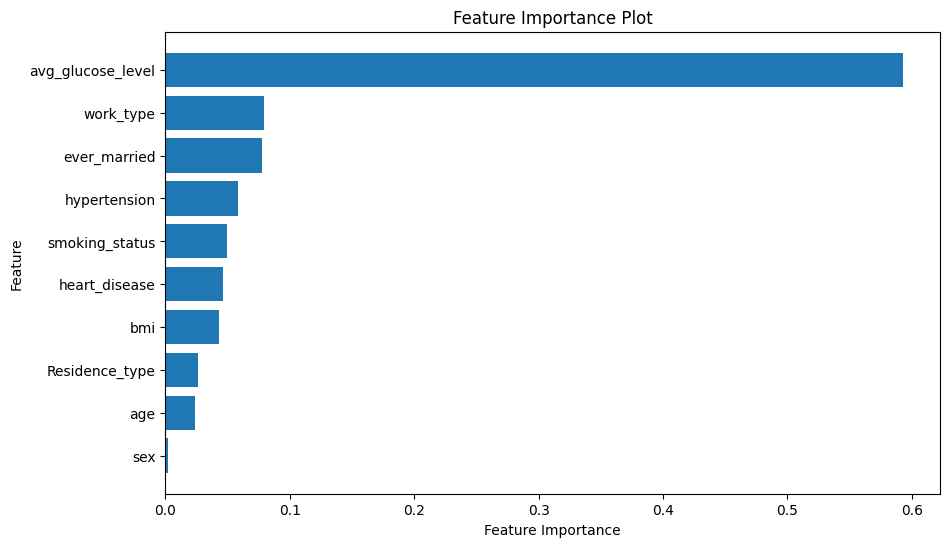

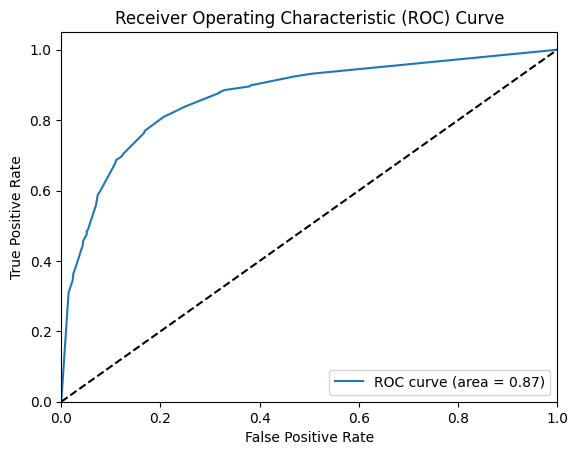

AUC Score: 0.8659559567081325


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8041958041958042, 0.8566433566433567, 0.7832167832167832, 0.8146853146853147, 0.8140350877192982, 0.8245614035087719, 0.7894736842105263, 0.7649122807017544, 0.8070175438596491, 0.8280701754385965]
Mean accuracy: 0.8086811434179856
95% confidence interval: (0.7902891190152749, 0.8270731678206963)


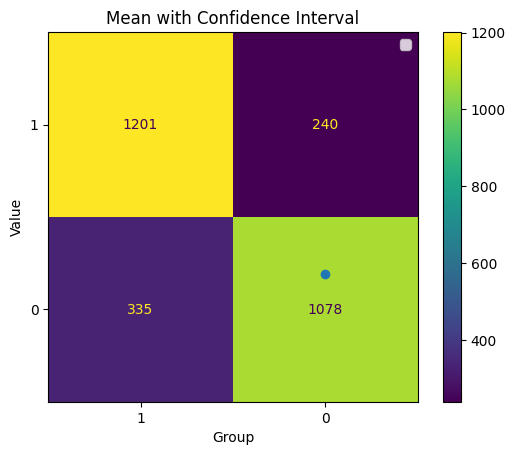


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1441
           1       0.65      0.75      0.70      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



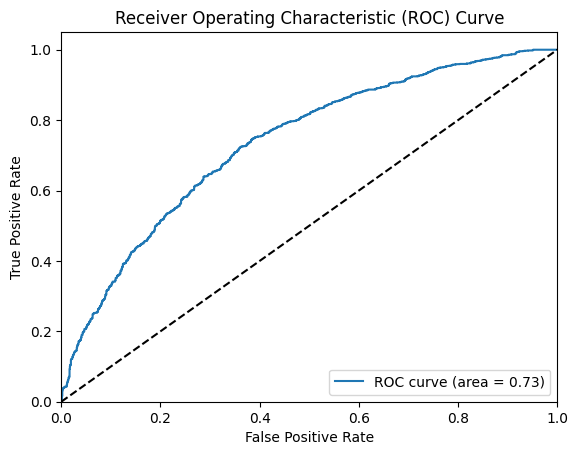

AUC Score: 0.7344579160595108


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6643356643356644, 0.6363636363636364, 0.6608391608391608, 0.6608391608391608, 0.656140350877193, 0.6456140350877193, 0.6807017543859649, 0.6526315789473685, 0.6456140350877193, 0.712280701754386]
Mean accuracy: 0.6615360078517973
95% confidence interval: (0.6460821134741217, 0.676989902229473)


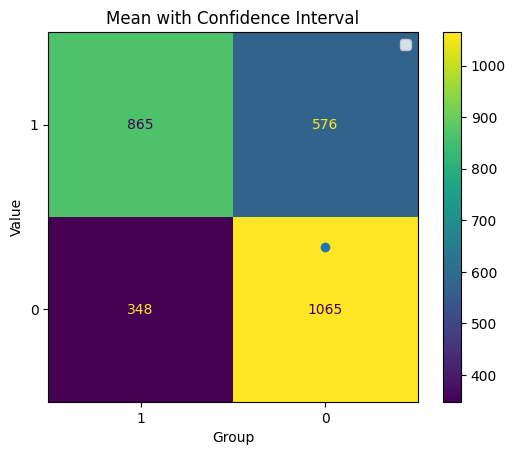

In [2]:
original_continuous_column = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['bmi'] = original_continuous_column

categorizing avg glucose level feature


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1441
           1       0.72      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.69      0.68      0.68      2854
weighted avg       0.69      0.68      0.68      2854

Node Labels:
 Annotation(0.492146, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


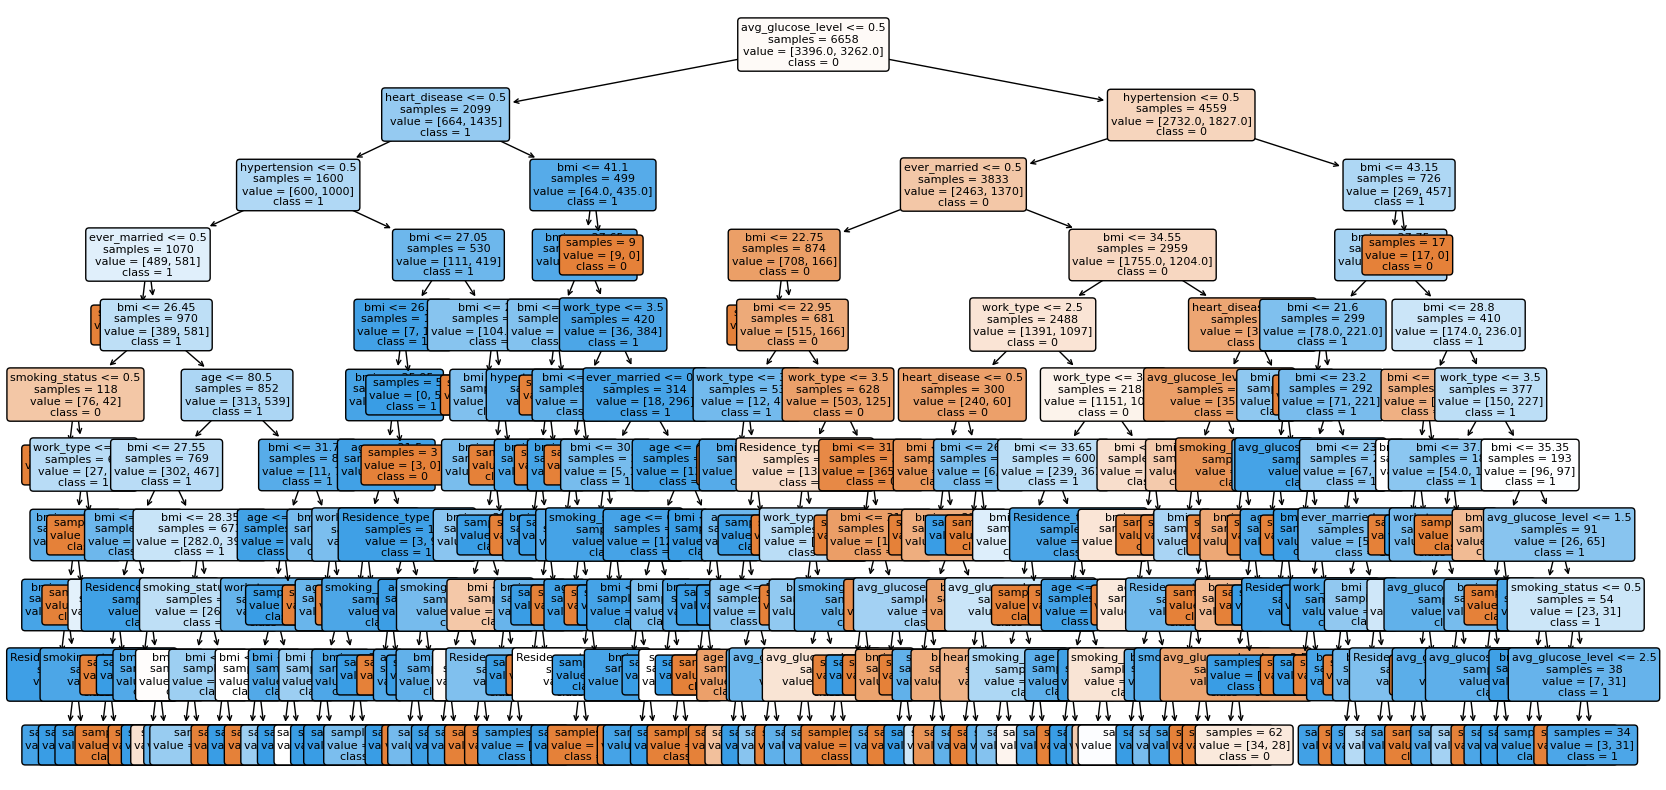

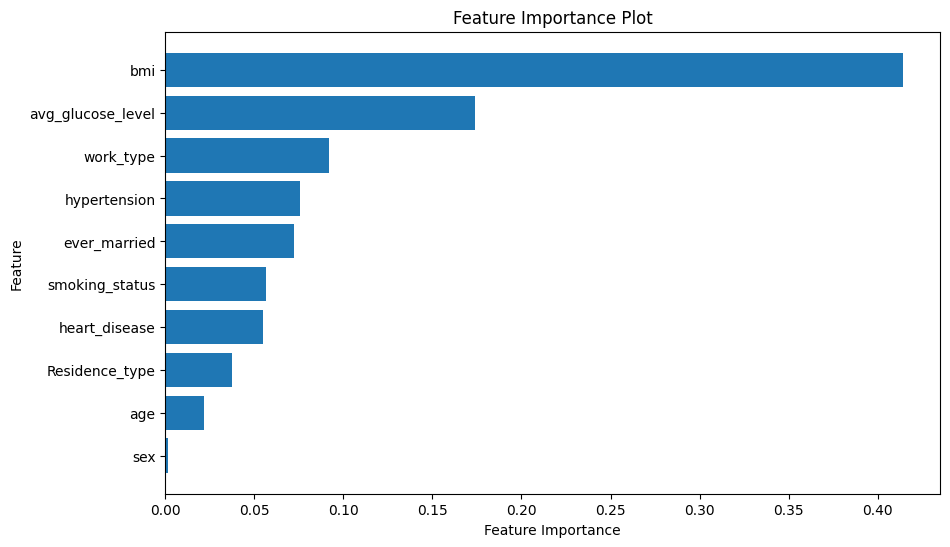

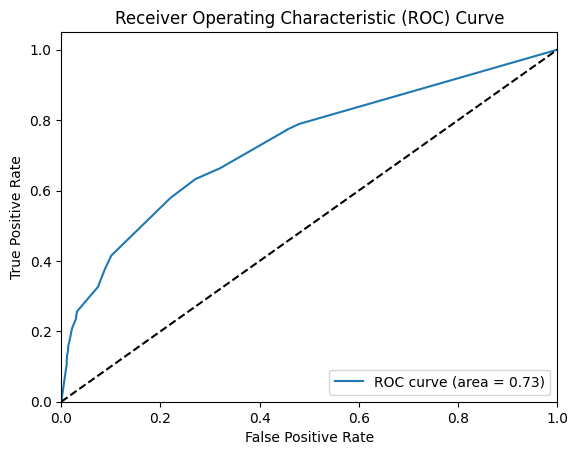

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.7305254617453771
Accuracy for each fold: [0.8216783216783217, 0.8076923076923077, 0.8321678321678322, 0.8076923076923077, 0.7859649122807018, 0.8, 0.8175438596491228, 0.8035087719298246, 0.8070175438596491, 0.8596491228070176]
Mean accuracy: 0.8142914979757085
95% confidence interval: (0.7997773330407515, 0.8288056629106656)


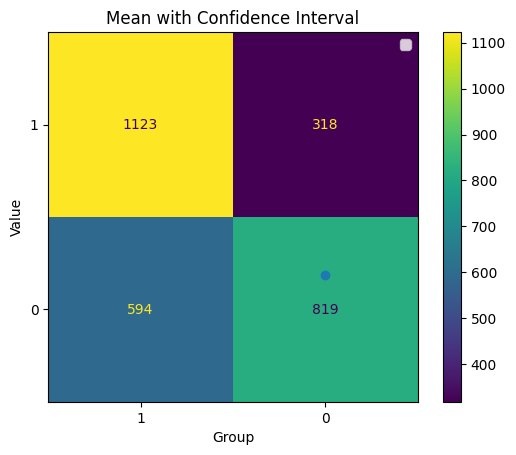


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



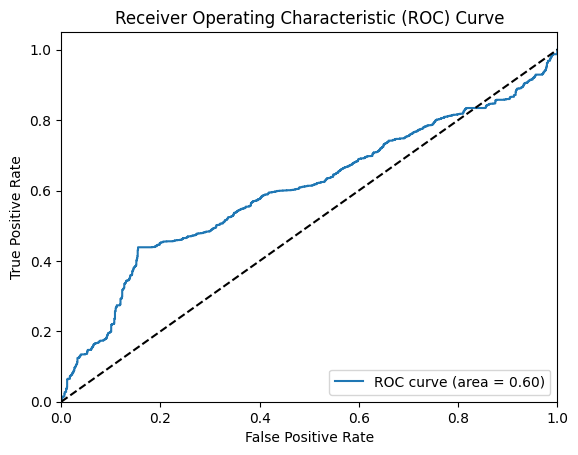

AUC Score: 0.6019425057204024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6608391608391608, 0.6433566433566433, 0.6748251748251748, 0.6713286713286714, 0.6736842105263158, 0.6631578947368421, 0.6771929824561403, 0.6385964912280702, 0.6385964912280702, 0.631578947368421]
Mean accuracy: 0.6573156667893512
95% confidence interval: (0.6447644226962858, 0.6698669108824166)


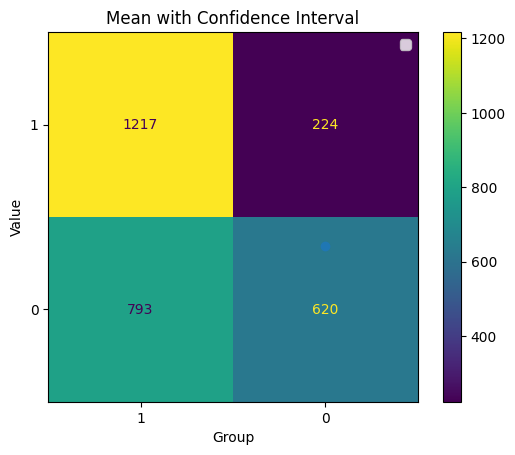

In [3]:
original_continuous_column = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column

categorizing bmi and avg_glucose_level features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.54      0.75      0.63      1441
           1       0.57      0.34      0.43      1413

    accuracy                           0.55      2854
   macro avg       0.56      0.55      0.53      2854
weighted avg       0.56      0.55      0.53      2854

Node Labels:
 Annotation(0.473183, 0.954545, 'avg_glucose_level <= 0.5\nsamples = 6658\nvalue = [3396.0, 3262.0]\nclass = 0')


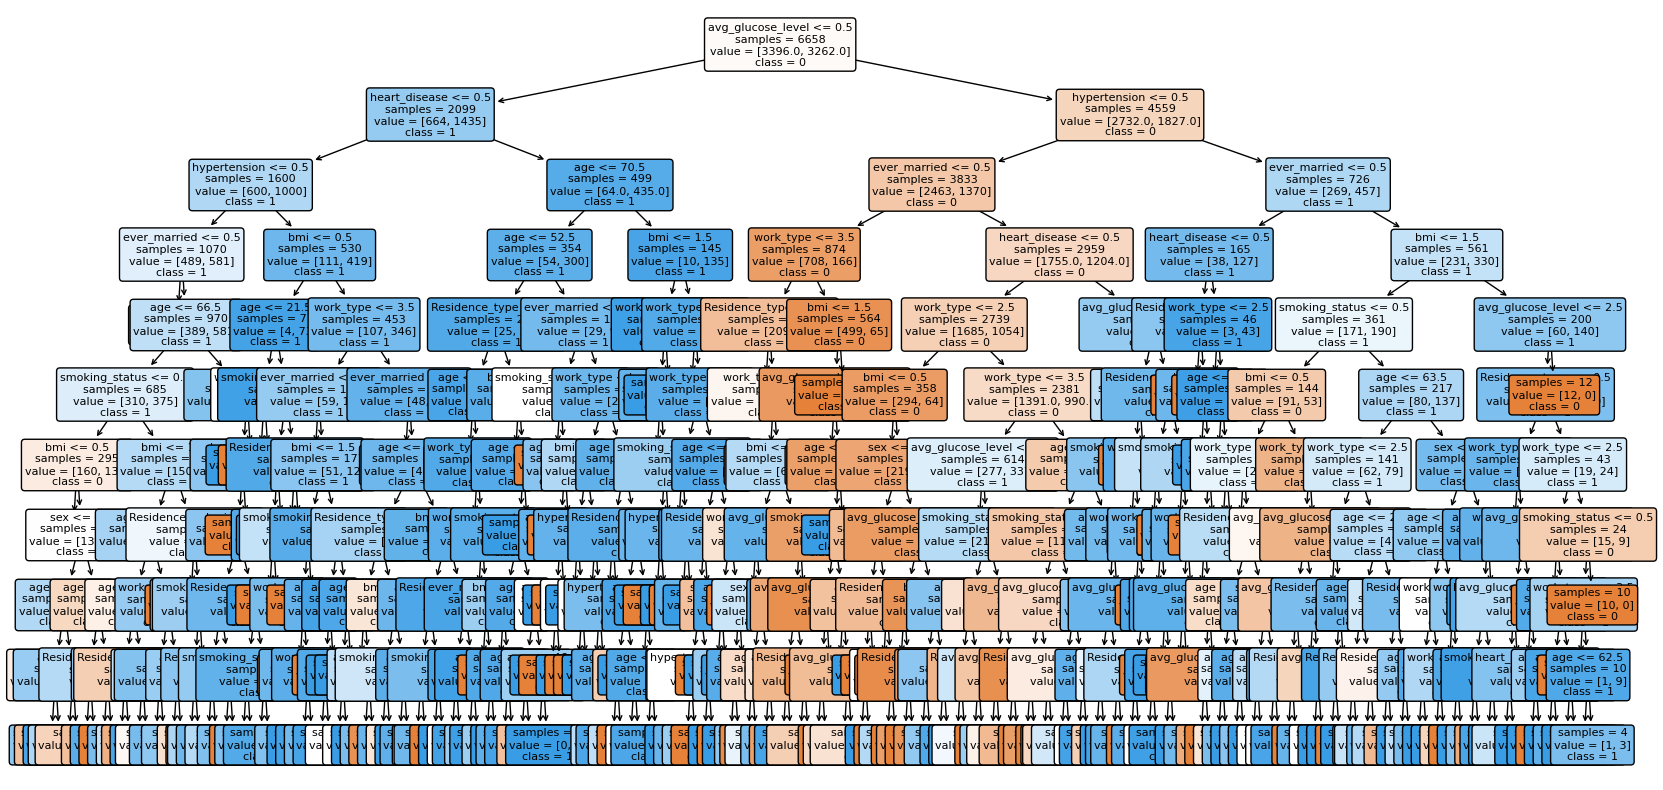

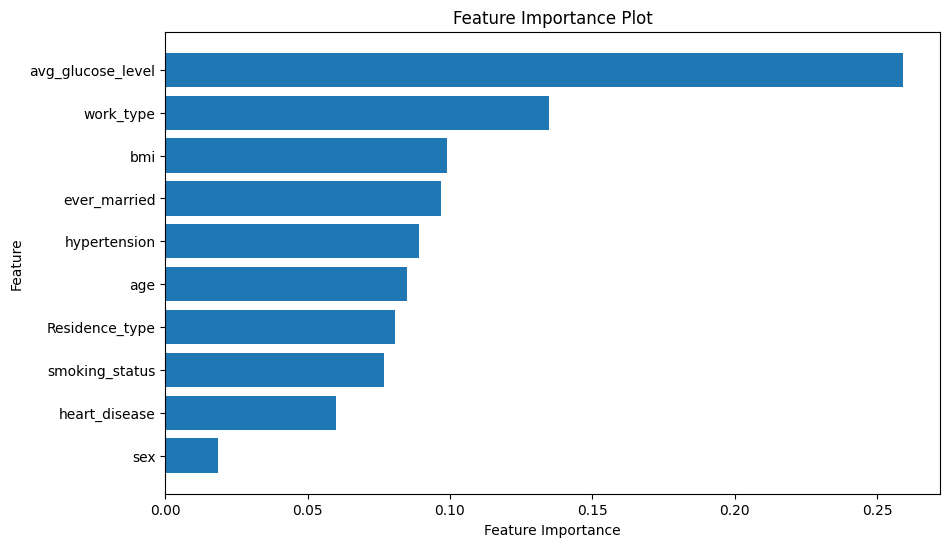

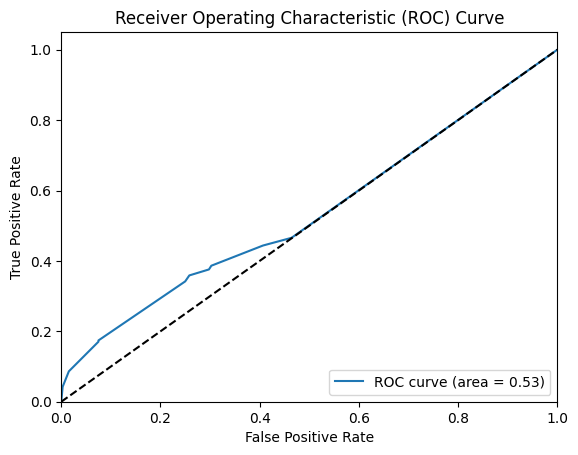

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.5349463910265194
Accuracy for each fold: [0.7937062937062938, 0.8251748251748252, 0.8356643356643356, 0.8251748251748252, 0.8280701754385965, 0.8350877192982457, 0.8350877192982457, 0.7929824561403509, 0.7894736842105263, 0.7964912280701755]
Mean accuracy: 0.8156913262176421
95% confidence interval: (0.8015048899157345, 0.8298777625195496)


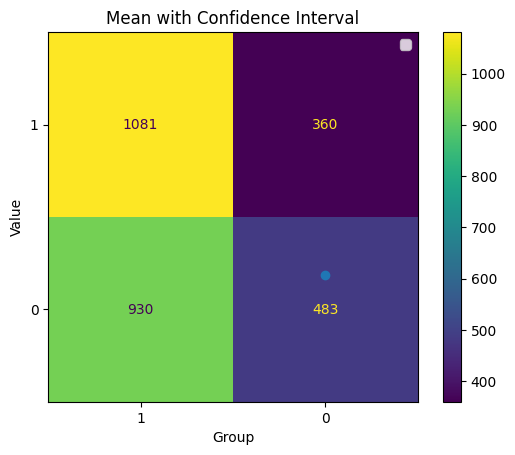


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



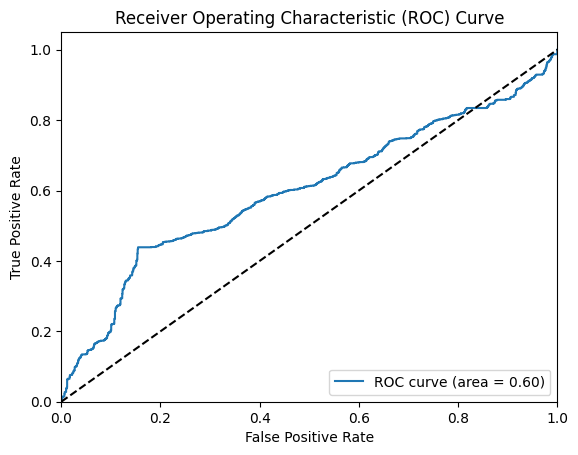

AUC Score: 0.5998429375684201


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6258741258741258, 0.6468531468531469, 0.7167832167832168, 0.6923076923076923, 0.631578947368421, 0.6491228070175439, 0.6385964912280702, 0.6385964912280702, 0.7157894736842105, 0.6526315789473685]
Mean accuracy: 0.6608133971291866
95% confidence interval: (0.6362540040362376, 0.6853727902221357)


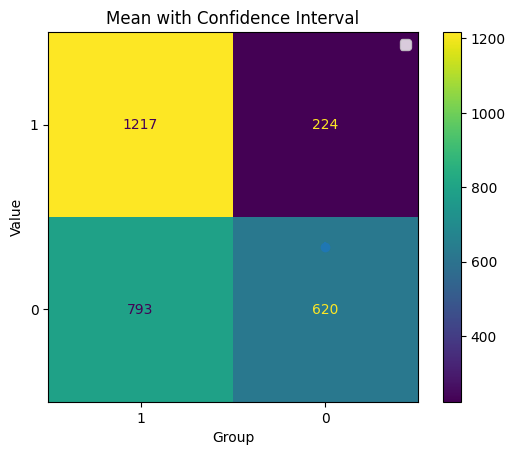

In [4]:
original_continuous_column_glucose = df['avg_glucose_level'].copy()
df = util_categorize.categorize_glucose(df)
df = util_categorize.label_encoding(df,'avg_glucose_level')

original_continuous_column_bmi = df['bmi'].copy()
df = util_categorize.categorize_bmi(df)
df = util_categorize.label_encoding(df,'bmi')

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)

print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df['avg_glucose_level'] = original_continuous_column_glucose
df['bmi'] = original_continuous_column_bmi